In [2]:
#BRIEF INFORMATION ON WHAT THIS PYTHON CODE IS DOING
#This code carries out Exploratory Data Analysis (EDA) of data of news 
#published on different sites, identifies patterns, 
#and explores the data. It then models, predicts, solves the problem, 
#and presents the visual, report, and problem-solving solution.
#The data are categoried into bullshit, junk science, hate, fake, conspiracy, 
#bias, satire and finally grouped into either fake or real
#The data were first acquire and clean to take care of null/missing values
#Transforming categorical data with the help of label encoders
#Change the uppercase to lowercase.
#Some of the library used include pandas, pandas_profiling, numpy, sklearn, seaborn
#matplotlib, Wordclouds
#In summary, the following were carried out
#Read In and Explore the Data
#Data Analysis
#Data Visualization
#Cleaning Data
#Choosing the Best predictive Model


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [4]:
# read data
import time
import numpy as np

t1 = time.time()
df = pd.read_csv(r'/home/adebayo/Desktop/practice-python/fake-news/news_articles.csv', encoding="latin", index_col=0)
t2 = time.time()
print('Elapsed time: ', np.round(t2-t1,2))



Elapsed time:  0.11


In [5]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, Barracuda Brigade to Eddy Lavine
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   published                2096 non-null   object 
 1   title                    2096 non-null   object 
 2   text                     2050 non-null   object 
 3   language                 2095 non-null   object 
 4   site_url                 2095 non-null   object 
 5   main_img_url             2095 non-null   object 
 6   type                     2095 non-null   object 
 7   label                    2095 non-null   object 
 8   title_without_stopwords  2094 non-null   object 
 9   text_without_stopwords   2046 non-null   object 
 10  hasImage                 2095 non-null   float64
dtypes: float64(1), object(10)
memory usage: 196.5+ KB


In [6]:
#Use pandas_profiling to get a quick summaryand insight into data and their 
#relationship that may exist in the variables
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [212]:
#Drop all NA rows
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [213]:
df.head()

published  \
author                                                
Barracuda Brigade     2016-10-26T21:41:00.000+03:00   
reasoning with facts  2016-10-29T08:47:11.259+03:00   
Barracuda Brigade     2016-10-31T01:41:49.479+02:00   
Fed Up                2016-11-01T05:22:00.000+02:00   
Fed Up                2016-11-01T21:56:00.000+02:00   

                                                                  title  \
author                                                                    
Barracuda Brigade     muslims busted they stole millions in govt ben...   
reasoning with facts  re why did attorney general loretta lynch plea...   
Barracuda Brigade     breaking weiner cooperating with fbi on hillar...   
Fed Up                pin drop speech by father of daughter kidnappe...   
Fed Up                fantastic trumps  point plan to reform healthc...   

                                                                   text  \
author                                                                    
Barracuda Brigade     print they should pay all the back all the mon...   
reasoning with facts  why did attorney general loretta lynch plead t...   
Barracuda Brigade     red state  \nfox news sunday reported this mor...   
Fed Up                email kayla mueller was a prisoner and torture...   
Fed Up                email healthcare reform to make america great ...   

                     language             site_url  \
author                                               
Barracuda Brigade     english  100percentfedup.com   
reasoning with facts  english  100percentfedup.com   
Barracuda Brigade     english  100percentfedup.com   
Fed Up                english  100percentfedup.com   
Fed Up                english  100percentfedup.com   

                                                           main_img_url  type  \
author                                                                          
Barracuda Brigade     http://bb4sp.com/wp-content/uploads/2016/10/Fu...  bias   
reasoning with facts  http://bb4sp.com/wp-content/uploads/2016/10/Fu...  bias   
Barracuda Brigade     http://bb4sp.com/wp-content/uploads/2016/10/Fu...  bias   
Fed Up                http://100percentfedup.com/wp-content/uploads/...  bias   
Fed Up                http://100percentfedup.com/wp-content/uploads/...  bias   

                     label                            title_without_stopwords  \
author                                                                          
Barracuda Brigade     Real        muslims busted stole millions govt benefits   
reasoning with facts  Real         attorney general loretta lynch plead fifth   
Barracuda Brigade     Real  breaking weiner cooperating fbi hillary email ...   
Fed Up                Real  pin drop speech father daughter kidnapped kill...   
Fed Up                Real  fantastic trumps point plan reform healthcare ...   

                                                 text_without_stopwords  \
author                                                                    
Barracuda Brigade     print pay back money plus interest entire fami...   
reasoning with facts  attorney general loretta lynch plead fifth bar...   
Barracuda Brigade     red state fox news sunday reported morning ant...   
Fed Up                email kayla mueller prisoner tortured isis cha...   
Fed Up                email healthcare reform make america great sin...   

                      hasImage  
author                          
Barracuda Brigade          1.0  
reasoning with facts       1.0  
Barracuda Brigade          1.0  
Fed Up                     1.0  
Fed Up                     1.0

In [214]:
df['type'].unique().tolist()

['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci', 'state']

In [215]:
df['sentence_length'] = df['text_without_stopwords'].str.split().str.len()
#Alternative way          
#df['n_text'] = [len(x.split()) for x in df['text_without_stopwords'].tolist()]

In [216]:
#Sort the column content
df.sort_values('sentence_length').tail(5)

published  \
author                                          
pak alresky     2016-10-28T11:58:00.000+03:00   
Jimmy Rustling  2016-11-11T12:00:00.000+02:00   
Mike Rivero     2016-11-02T01:43:00.000+02:00   
No Author       2016-11-24T18:22:24.607+02:00   
Luke Stranahan  2016-11-23T15:10:56.702+02:00   

                                                            title  \
author                                                              
pak alresky                                              no title   
Jimmy Rustling  obama signs executive order declaring investig...   
Mike Rivero     party corruption clinton campaign directly tie...   
No Author       vidÃ©o que trouveton dans  le gorafi de lannÃ©...   
Luke Stranahan                      is feminism a giant shit test   

                                                             text language  \
author                                                                       
pak alresky     united states marine field mcconnell  plum cit...  english   
Jimmy Rustling  united states marine field mcconnell  plum cit...  english   
Mike Rivero     november   by wire  comments \npatrick henning...  english   
No Author       study running linked to extended lifespan and ...  english   
Luke Stranahan  marianne lyles mariannelyles november   \n\npo...  english   

                           site_url  \
author                                
pak alresky          abeldanger.net   
Jimmy Rustling       abcnews.com.co   
Mike Rivero     21stcenturywire.com   
No Author               legorafi.fr   
Luke Stranahan    returnofkings.com   

                                                     main_img_url        type  \
author                                                                          
pak alresky                                          No Image URL          bs   
Jimmy Rustling  http://abcnews.com.co/wp-content/uploads/2016/...        fake   
Mike Rivero     http://i1.wp.com/21stcenturywire.com/wp-conten...  conspiracy   
No Author                                            No Image URL      satire   
Luke Stranahan                                       No Image URL        hate   

               label                            title_without_stopwords  \
author                                                                    
pak alresky     Fake                                              title   
Jimmy Rustling  Fake  obama signs executive order declaring investig...   
Mike Rivero     Fake  party corruption clinton campaign directly tie...   
No Author       Fake  jy crois encore par alain juppÃ© en train deff...   
Luke Stranahan  Real       exploration finding meaning life logotherapy   

                                           text_without_stopwords  hasImage  \
author                                                                        
pak alresky     united states marine field mcconnell plum city...       0.0   
Jimmy Rustling  united states marine field mcconnell plum city...       1.0   
Mike Rivero     november wire comments patrick henningsen st c...       1.0   
No Author       zika masterpiece public mind control saturday ...       0.0   
Luke Stranahan  hillary laugh factory part loser users browsin...       0.0   

                sentence_length  
author                           
pak alresky                2639  
Jimmy Rustling             2771  
Mike Rivero                2868  
No Author                  2981  
Luke Stranahan             3015

count    2045.000000
mean      280.788753
std       344.896384
min         1.000000
25%        70.000000
50%       187.000000
75%       357.000000
max      3015.000000
Name: sentence_length, dtype: float64


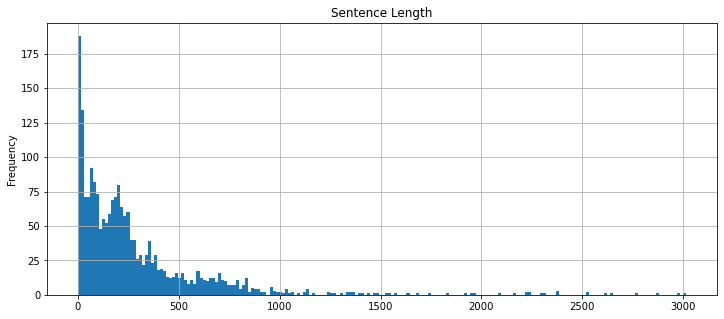

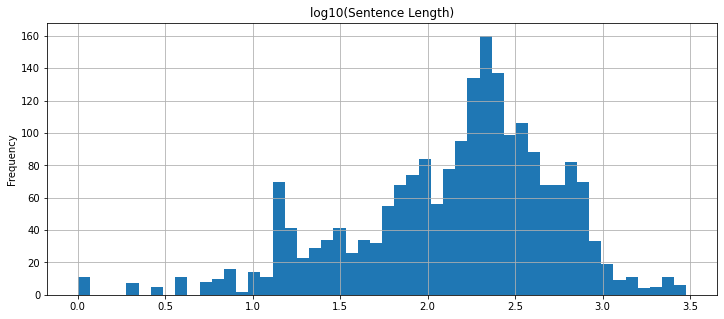

In [217]:
# sentence length
print(df.sentence_length.describe())

plt.figure(figsize=(12,5))
df.sentence_length.plot(kind='hist', bins=200)
plt.title('Sentence Length')
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
np.log10(df.sentence_length).plot(kind='hist', bins=50)
plt.title('log10(Sentence Length)')
plt.grid()
plt.show()

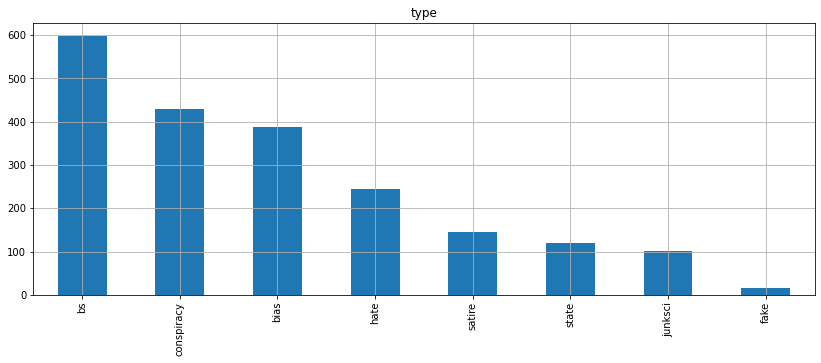

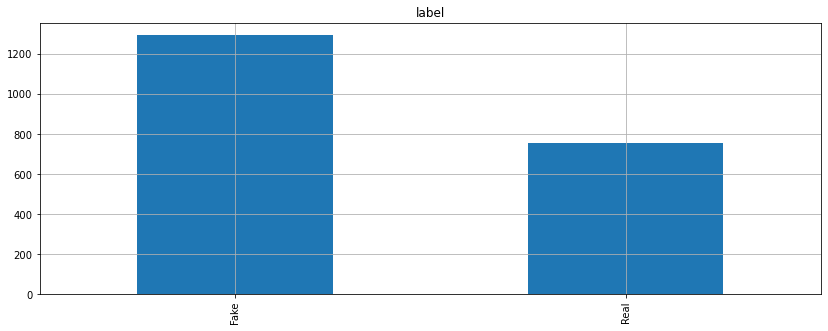

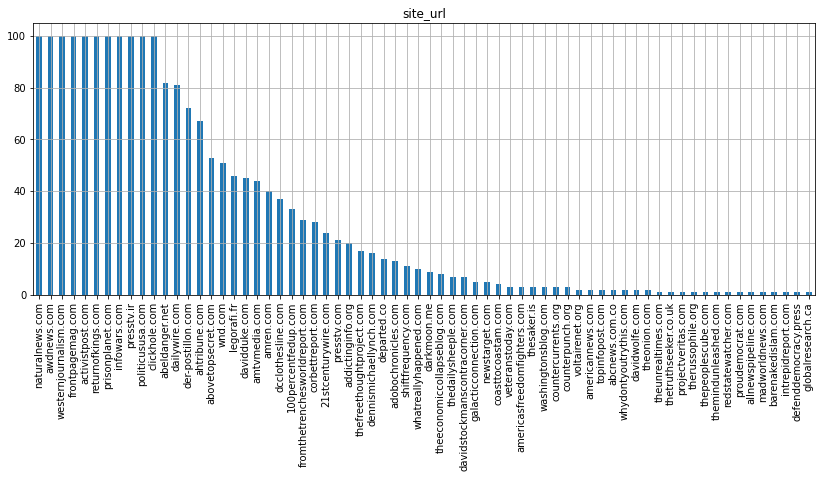

In [218]:
# categorical features
features_cat = ['type', 'label', 'site_url']

# plot distributions
for f in features_cat:
    plt.figure(figsize=(14,5))
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [219]:
#cf function is good for interactive plot, it influence the plot public appearance
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [220]:
#Transforming string data into intergers
df['type_tonum'] = df['type']
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.type_tonum.drop_duplicates()) 
df.type_tonum = le.transform(df.type_tonum)

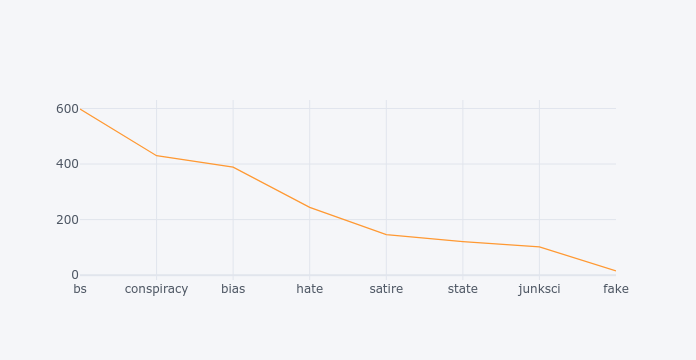

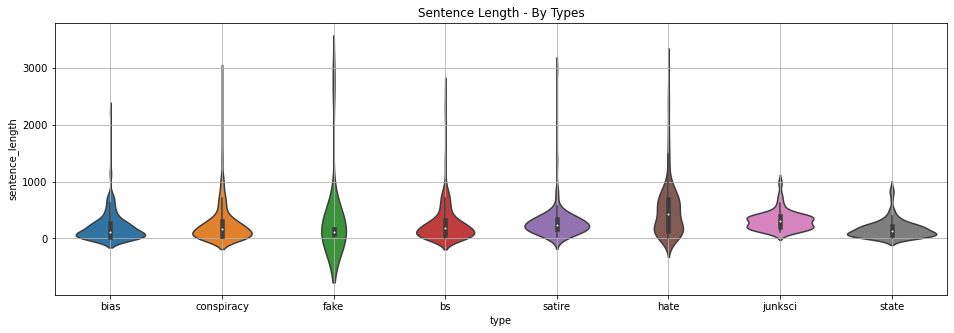

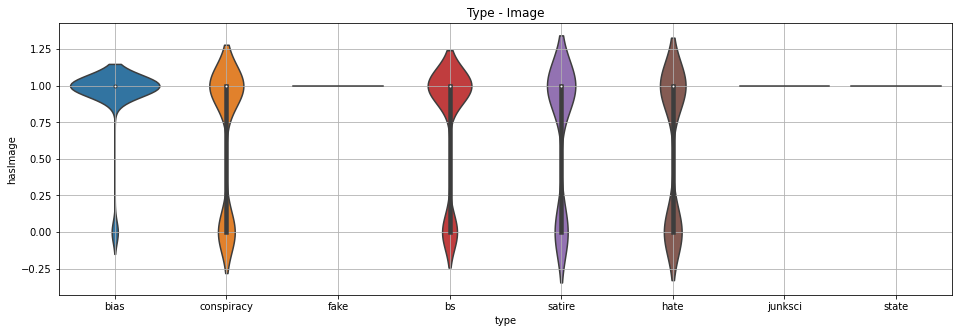

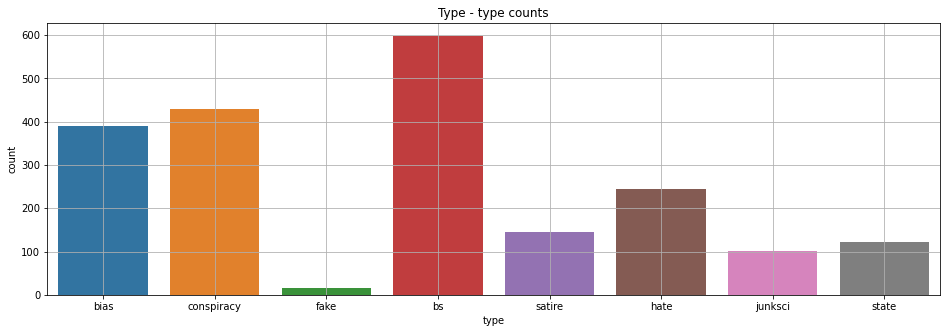

<Figure size 1152x360 with 0 Axes>

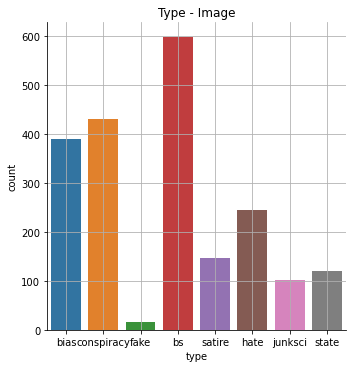

In [221]:
df['type'].value_counts().iplot()

# plot sentence length split by type
plt.figure(figsize=(16,5))
sns.violinplot(x='type', y='sentence_length', data=df)
plt.title('Sentence Length - By Types')
plt.grid()

# plot sentence label split by type
plt.figure(figsize=(16,5))
sns.violinplot(x='type', y='hasImage', data=df)
plt.title('Type - Image')
plt.grid()

#Direct Count plot
plt.figure(figsize=(16,5))
sns.countplot(x='type', data=df)
plt.title('Type - type counts')
plt.grid()

# plot sentence label split by type
plt.figure(figsize=(16,5))
sns.catplot(x='type', data=df, kind="count")
plt.title('Type - Image')
plt.grid()

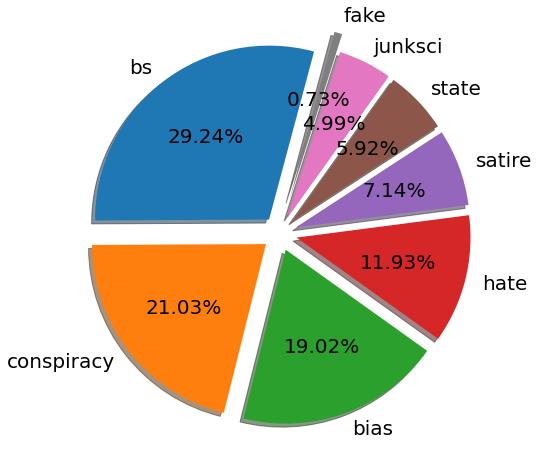

In [272]:
#Distrubution of types of articles
#If you add "explode=" you split the chart but must be equal to the 
#number of the chart content and any of  its number list can be change to adjust the plot,
# you can also add shadow and percentage "autopct"
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75, 
                                   fontsize = 20, 
                                   explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2),
                                  autopct='%1.2f%%', shadow=True)
#plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [223]:
#Evaluate by School and Author
# mean of numerical features
selected = ['sentence_length', 'hasImage']
df.groupby(by=['type'])[selected].mean().round(2)


sentence_length  hasImage
type                                 
bias                 210.51      0.94
bs                   271.12      0.75
conspiracy           249.95      0.67
fake                 311.40      1.00
hate                 508.16      0.59
junksci              320.27      1.00
satire               280.24      0.68
state                169.18      1.00

In [224]:
# sentence count (wrap in DataFrame to get nicer display)
pd.DataFrame( df.groupby(by=['type'])['title'].count() )

title
type             
bias          389
bs            598
conspiracy    430
fake           15
hate          244
junksci       102
satire        146
state         121

In [225]:
#Unigrams and bigrams
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

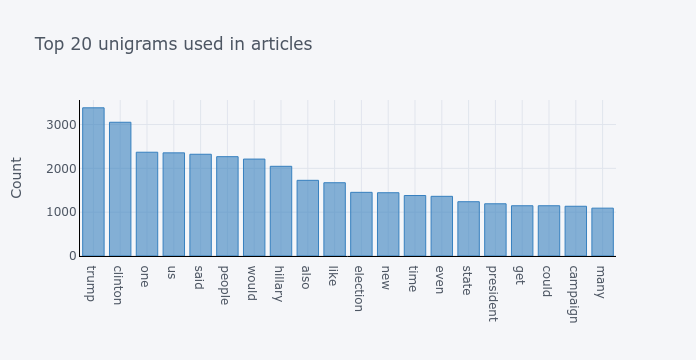

In [226]:
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams used in articles',color='blue')


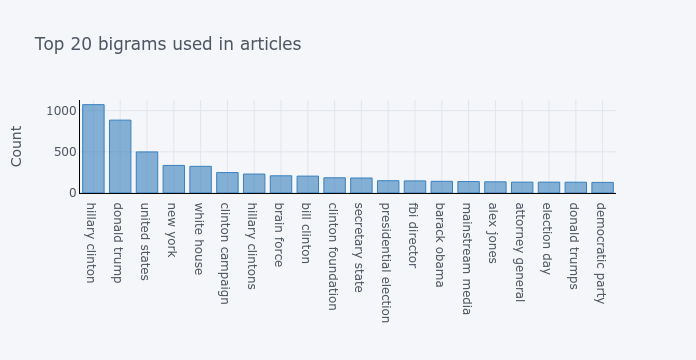

In [227]:
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used in articles', color='blue')

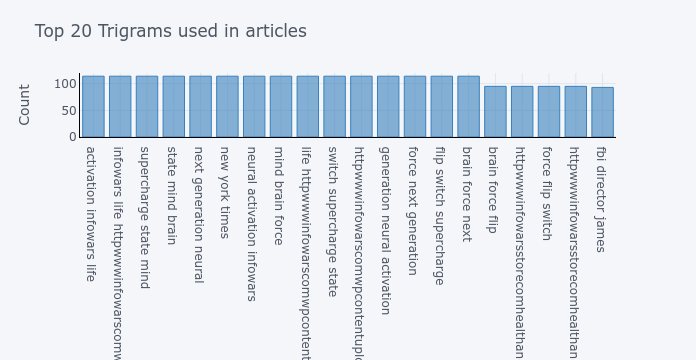

In [228]:
common_words = get_top_n_trigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams used in articles', color='blue')

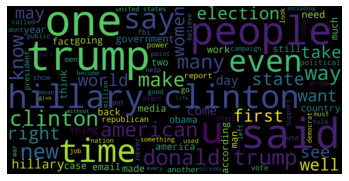

In [229]:
#WordCloud of articles
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=2000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Type =  BIAS :


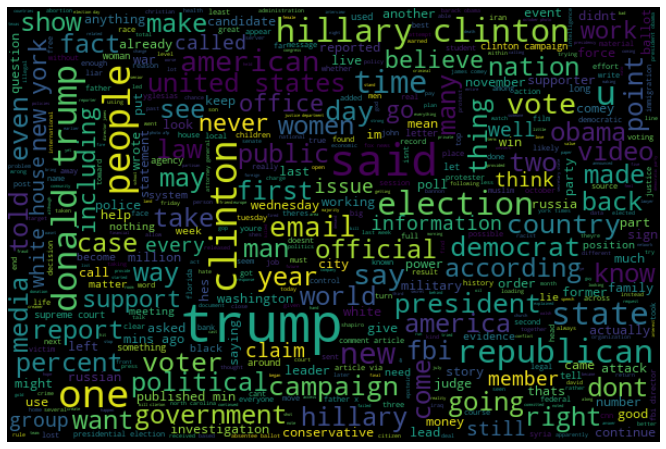

Type =  CONSPIRACY :


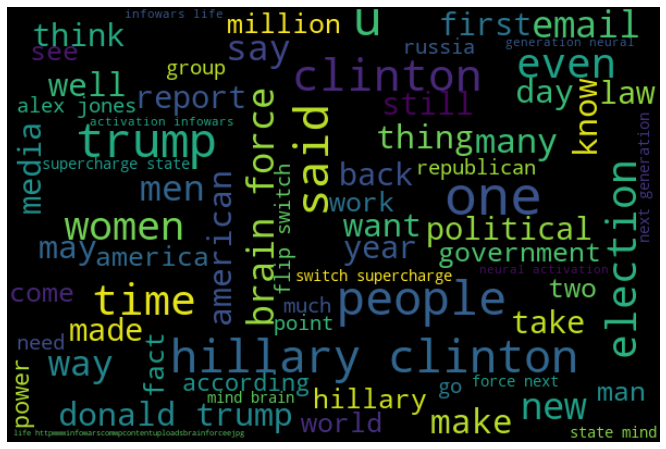

Type =  FAKE :


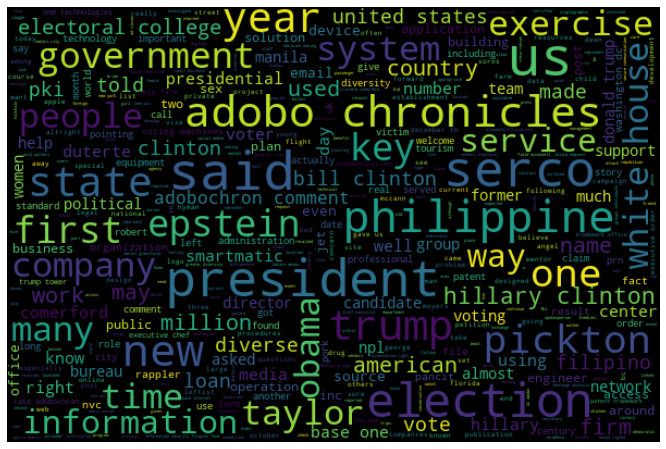

Type =  BS :


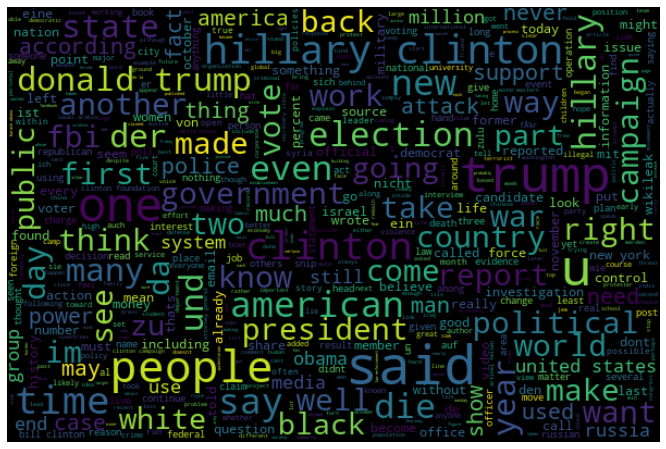

Type =  SATIRE :


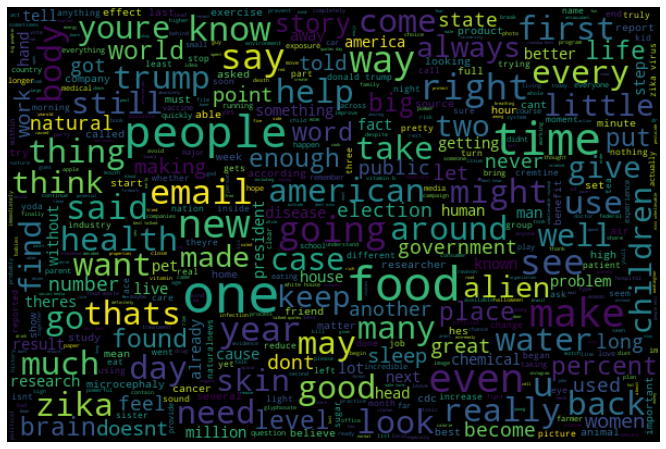

Type =  HATE :


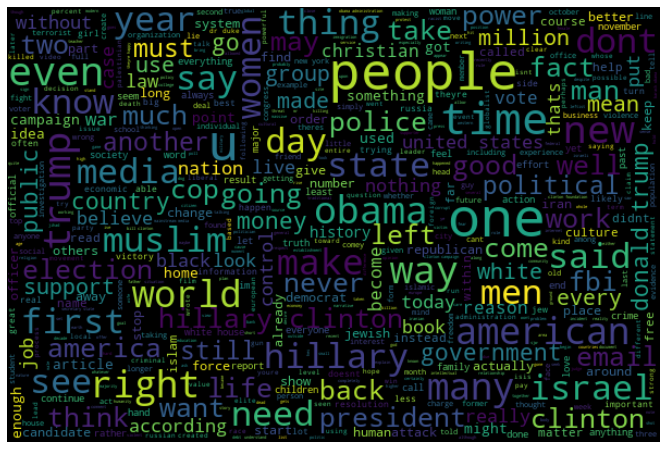

Type =  JUNKSCI :


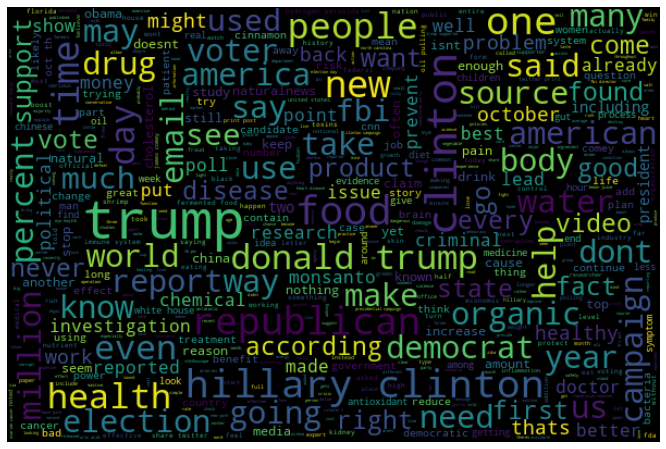

Type =  STATE :


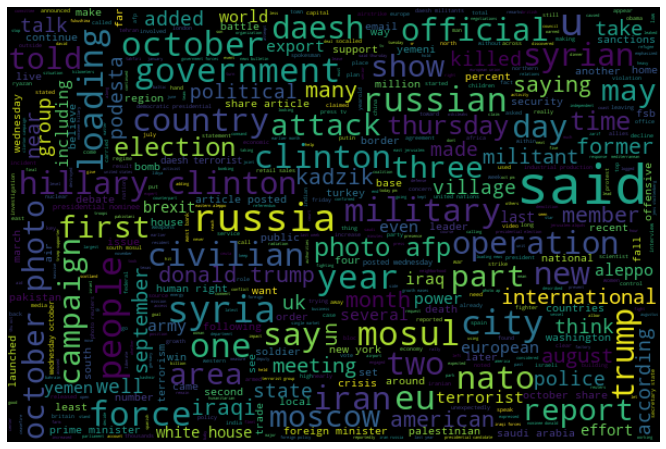

Elapsed time:  11.29


In [230]:
#Wordclouds by type
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)

types = df.type.unique().tolist()

t1 = time.time()
for ty in types:
    df_temp = df[df.type==ty]
    
    print('Type = ', ty.upper(), ':')
    
    # render wordcloud
    text = " ".join(txt for txt in df_temp.text_without_stopwords)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="black").generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
t2 = time.time()
print('Elapsed time: ', np.round(t2-t1,2))


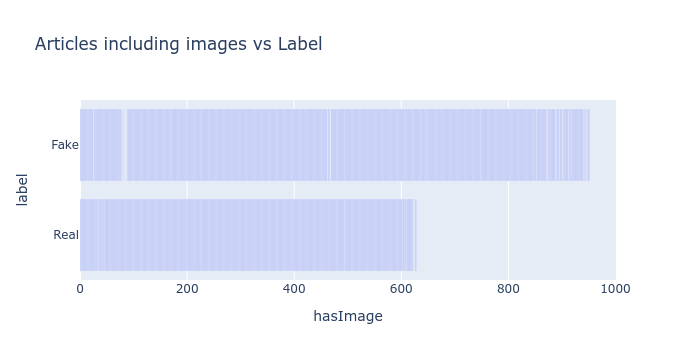

In [231]:
#Articles including images vs Label
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [232]:
#Showing the images through the link
def convert(path):
    return '<img src="'+ path + '" width="80">'


df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)


In [233]:
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

In [234]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

In [235]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [236]:
type_label = {'Real': 0, 'Fake': 1}
df_sources.label = [type_label[item] for item in df_sources.label] 

val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

In [237]:
#Websites publishing real news
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"{y_}Websites publishing real news:{g_}{uniqueValues_real}\n") 



Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']



In [238]:
#Websites publishing fake news
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"{y_}Websites publishing fake news:{r_}{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com',

In [239]:
#Websites publishing both real and fake news
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"{y_}Websites publishing both real and fake news:{m_}{real_set & fake_set}\n")

Websites publishing both real and fake news:{'prisonplanet.com', 'presstv.ir', 'davidduke.com', 'washingtonsblog.com', 'newstarget.com', 'frontpagemag.com', 'westernjournalism.com', 'fromthetrenchesworldreport.com', 'returnofkings.com'}



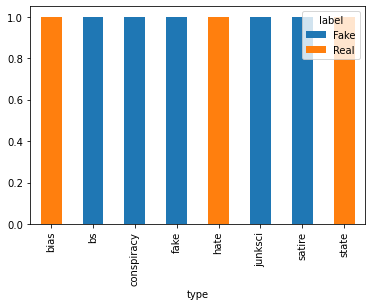

In [240]:
#Label vs Type

#type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
#df.type = [type1[item] for item in df.type] 


def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

plot_bar(df,'type' , 'label')
plt.show()

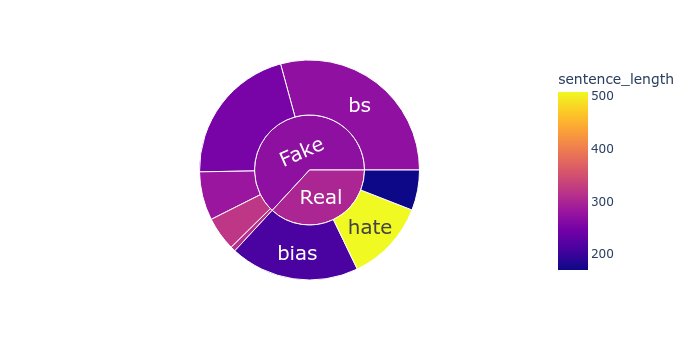

In [271]:
fig = px.sunburst(df, path=['label', 'type'], color='sentence_length',
                 )
fig.update_layout(uniformtext=dict(minsize=20, mode='hide'))
fig.show()

In [194]:
#Shuffling values
df1 = df.sample(frac=1)
df1.head()

published  \
author                                               
Anonymous            2016-10-29T20:55:00.000+03:00   
Corbett              2016-11-16T20:59:47.037+02:00   
Dr. Majid Rafizadeh  2016-10-27T09:20:34.163+03:00   
No Author            2016-11-16T22:46:54.372+02:00   
No Author            2016-11-16T15:25:44.671+02:00   

                                                                 title  \
author                                                                   
Anonymous                                                     no title   
Corbett              notmypresident draintheswamp the real revoluti...   
Dr. Majid Rafizadeh                        weird bans on women in iran   
No Author            life  times neil degrasse tyson threatened som...   
No Author            pourquoi je suis candidat Ã  la prÃ©sidentiell...   

                                                                  text  \
author                                                                   
Anonymous                 draining the swamp  youtubecomwatchvotakuaoi   
Corbett              podcast play in new window  download  embed \n...   
Dr. Majid Rafizadeh  bill clinton inc billions for the foundation  ...   
No Author            email \nget ready for the most cringeworthy st...   
No Author            claim watching scary movies could help boost y...   

                    language           site_url  \
author                                            
Anonymous            english     abeldanger.net   
Corbett              english  corbettreport.com   
Dr. Majid Rafizadeh  english   frontpagemag.com   
No Author            english      clickhole.com   
No Author            english        legorafi.fr   

                                                          main_img_url  type  \
author                                                                         
Anonymous                                                 No Image URL     3   
Corbett                                                   No Image URL     3   
Dr. Majid Rafizadeh  http://www.frontpagemag.com/sites/default/file...     5   
No Author            http://images.onionstatic.com/clickhole/3467/6...     4   
No Author                                                 No Image URL     4   

                    label                            title_without_stopwords  \
author                                                                         
Anonymous            Fake                                              title   
Corbett              Fake  notmypresident draintheswamp real revolution a...   
Dr. Majid Rafizadeh  Real  obama used religious test favor muslims christ...   
No Author            Fake  life times neil degrasse tyson threatened some...   
No Author            Fake  dÃ©bat primaire de la droite les franÃ§ais pas...   

                                                text_without_stopwords  \
author                                                                   
Anonymous                      draining swamp youtubecomwatchvotakuaoi   
Corbett              podcast play new window download embed helpful...   
Dr. Majid Rafizadeh  reprinted spectatororg tom hayden vietnam war ...   
No Author            email get ready cringeworthy story youre going...   
No Author            soy consumed significant quantities unless fer...   

                     hasImage  sentence_length  type_tonum  
author                                                      
Anonymous                 0.0                3           1  
Corbett                   0.0               64           1  
Dr. Majid Rafizadeh       1.0              889           4  
No Author                 1.0              232           6  
No Author                 0.0              135           6

In [196]:
#Training and Testing

y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source
x.head(5)
#Right after preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized.
#In order to get a sparse matrix of TF/IDF values, the following steps are taken:
#Tokenization of texts
#Counting of the tokens and
#Transforming the raw tokens into TF/IDF values
#The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used as input to estimators/classifiers.


author
Anonymous              abeldanger.net draining swamp youtubecomwatchv...
Corbett                corbettreport.com podcast play new window down...
Dr. Majid Rafizadeh    frontpagemag.com reprinted spectatororg tom ha...
No Author              clickhole.com email get ready cringeworthy sto...
No Author              legorafi.fr soy consumed significant quantitie...
Name: source, dtype: object

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names_out())

In [198]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [199]:
tfidf_train.shape

(1431, 38258)

In [200]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.933


In [201]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.866
